<a href="https://colab.research.google.com/github/RuwanPradeep0/Machine-Learning-Module-EC9630/blob/main/Assignments/Assignment%2001/Customer_Spend_Segmentation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1**

Data Set	 - Wholesale Customers Dataset

Link To Data set -

a. Problem selection
I am Ussing the Wholesale Customers dataset to identify different groups of customers based on their annual spending on various product categories.  By doing this, we can understand different spending patterns among customers and possibly tailor marketing strategies for each group.


b. Problem Statement
The goal of this project is to segment customers of a wholesale distributor into distinct clusters based on their annual spending on different product categories. These clusters will help in identifying unique customer profiles and understanding their purchasing behavior.


c. Dataset description
•	Size: 440 instances (rows)
•	Features: 8
o	Channel: Type of customer channel (Hotel/Restaurant/Café or Retail)
o	Region: Geographical region of the customer
o	Fresh: Annual spending on fresh products
o	Milk: Annual spending on milk products
o	Grocery: Annual spending on grocery products
o	Frozen: Annual spending on frozen products
o	Detergents_Paper: Annual spending on detergents and paper products
o	Delicassen: Annual spending on delicatessen products


d. Experimental Platform and Environment
Programming Language: Python
Libraries:
•	Pandas: For data manipulation and analysis
•	NumPy: For numerical operations
•	Scikit-learn: For clustering algorithms (like K-Means)
•	Matplotlib/Seaborn: For data visualization
Environment: Google Colab


# **Assignment 2**

**a. Data Preparation**

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid
# For warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
data = pd.read_csv("/content/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
# Basic information
data.info()


# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [7]:

# Data cleaning
data = data.dropna()

# Data normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 2:])

# Convert scaled data back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[2:])

**b. Exploratory Data Analysis**

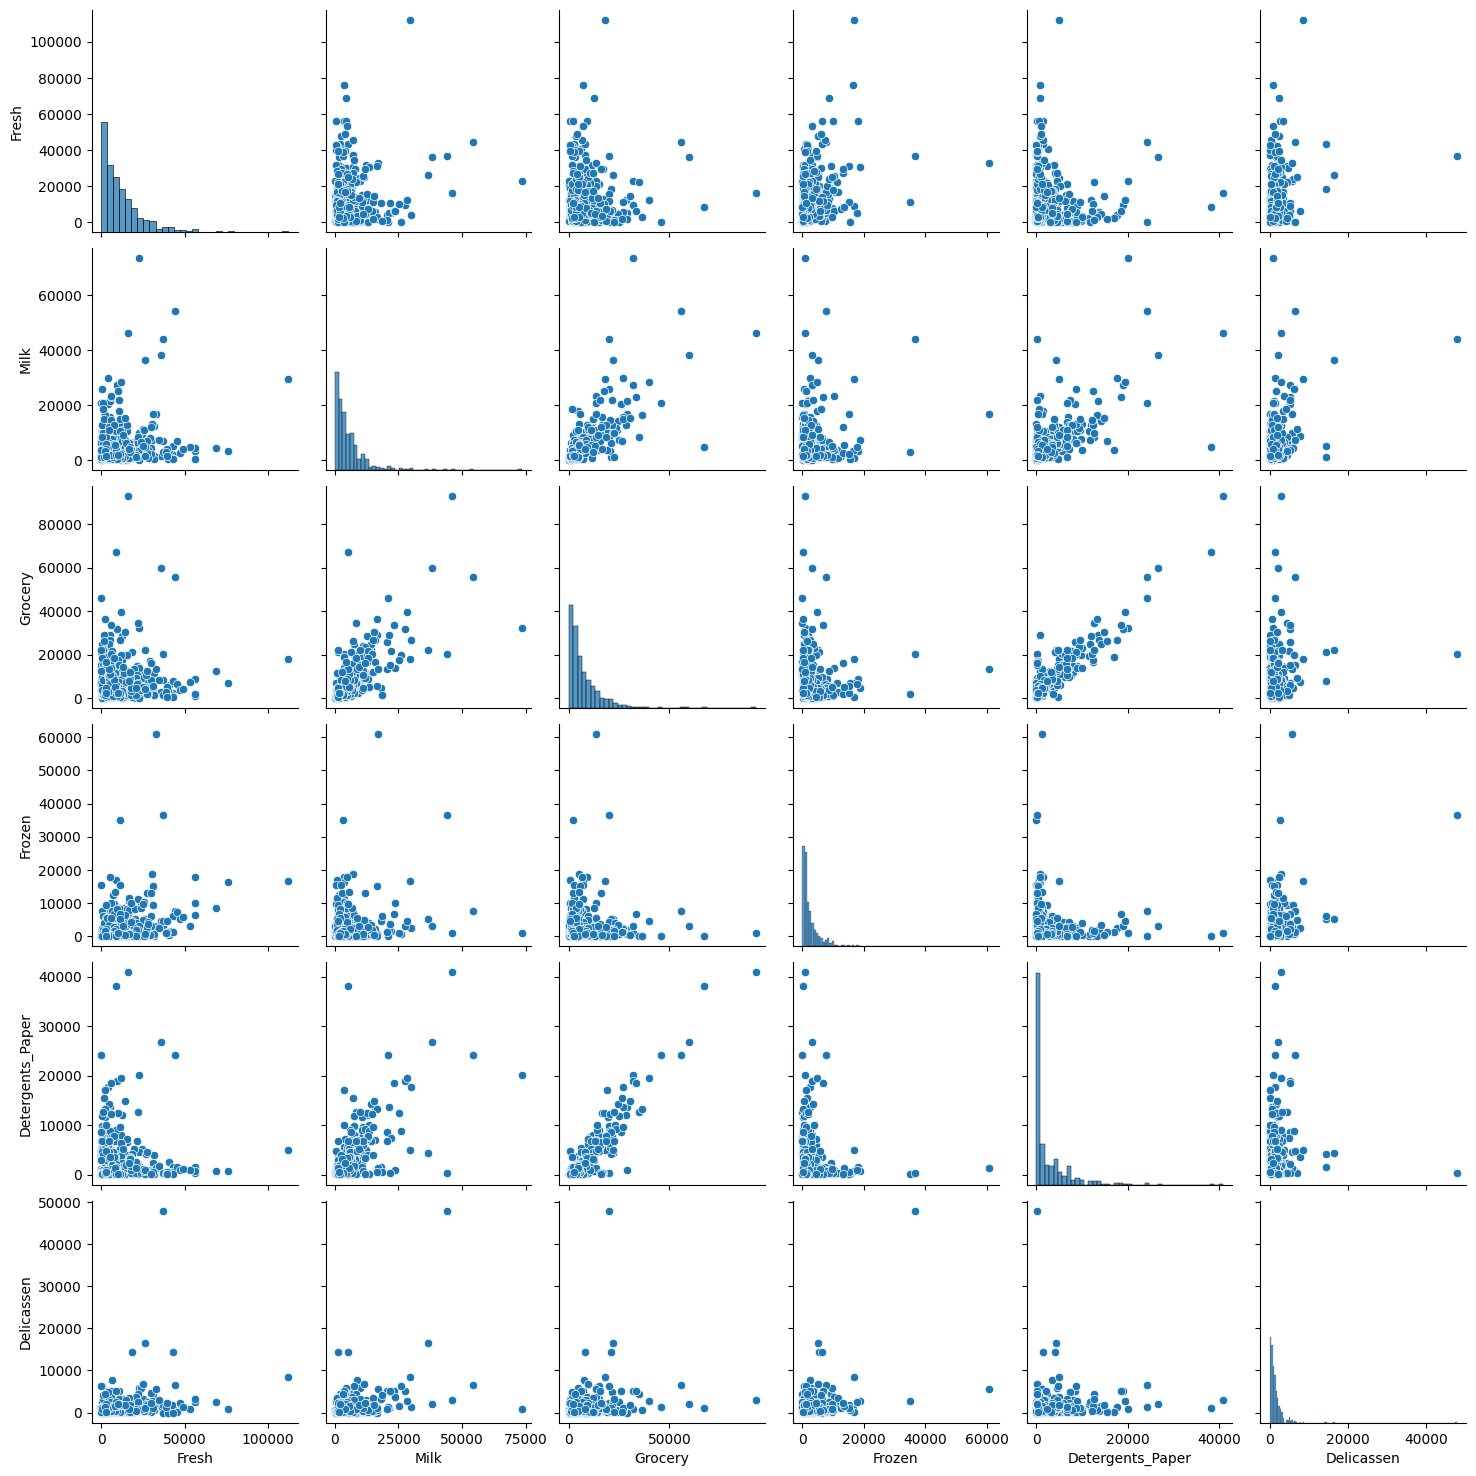

In [8]:

# Descriptive statistics
data.head(10)

# Pairplot
sns.pairplot(data.iloc[:, 2:])
plt.show()


**c. Hyperparameter Analysis and Selection**

**a. K-Means Clustering**

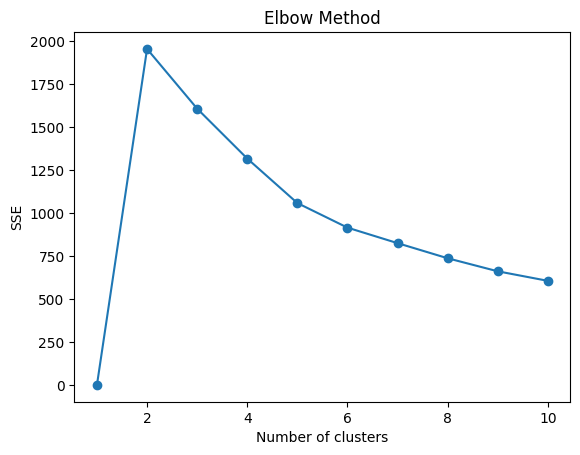

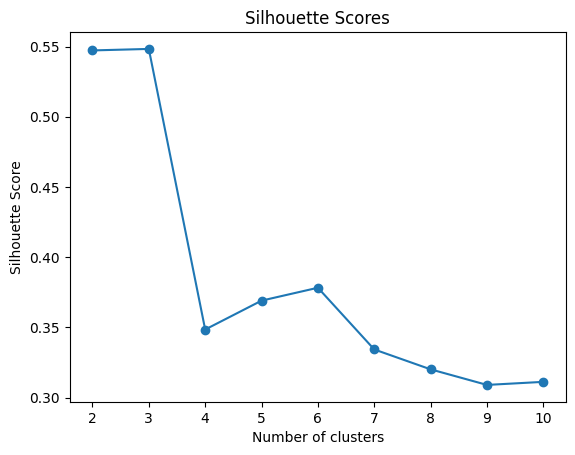

Optimal number of clusters for K-Means: 3


In [10]:
# Elbow method and Silhouette score combined for KMeans
def kmeans_tuning(data_scaled):
    sse = []
    silhouette_scores = []
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        sse.append(kmeans.inertia_)
        score = silhouette_score(data_scaled, kmeans.labels_)
        silhouette_scores.append(score)

    plt.figure()
    plt.plot(range(1, 11), [0] + sse, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.show()

    plt.figure()
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.title('Silhouette Scores')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    return sse, silhouette_scores

sse, silhouette_scores = kmeans_tuning(data_scaled)

# Optimal number of clusters (e.g., 3 from the elbow method and silhouette score)
optimal_k = 3  # Update this based on your analysis
print(f'Optimal number of clusters for K-Means: {optimal_k}')


**b. DBSCAN Clustering**

In [13]:
def dbscan_tuning(data_scaled):
    param_grid = {'eps': np.arange(0.1, 1.0, 0.1),
                  'min_samples': range(1, 10)}

    best_params = None
    best_score = -1

    for params in ParameterGrid(param_grid):
        dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
        labels = dbscan.fit_predict(data_scaled)
        if len(set(labels)) > 1:  # More than 1 cluster formed
            score = silhouette_score(data_scaled, labels)
            if score > best_score:
                best_score = score
                best_params = params

    print(f'Best DBSCAN params: {best_params}')
    return best_params

best_dbscan_params = dbscan_tuning(data_scaled)


Best DBSCAN params: {'eps': 0.9, 'min_samples': 4}


**c. Hierarchical Clustering**

In [14]:
def hierarchical_tuning(data_scaled):
    linkage_methods = ['ward', 'complete', 'average', 'single']
    best_score = -1
    best_method = None
    best_k = None

    for method in linkage_methods:
        Z = linkage(data_scaled, method=method)
        for k in range(2, 11):
            labels = fcluster(Z, t=k, criterion='maxclust')
            score = silhouette_score(data_scaled, labels)
            if score > best_score:
                best_score = score
                best_method = method
                best_k = k

    print(f'Best Hierarchical Clustering method: {best_method}, Number of clusters: {best_k}')
    return best_method, best_k

best_hierarchical_method, best_hierarchical_k = hierarchical_tuning(data_scaled)


Best Hierarchical Clustering method: complete, Number of clusters: 2


# Assignment **3**

**Clustering with Optimal Hyperparameters**

**K-Means Clustering**

In [15]:
# Optimal number of clusters (e.g., 3 from the elbow method and silhouette score)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)
labels_kmeans = kmeans.labels_

# Add labels to the original data
data['Cluster_KMeans'] = labels_kmeans



**DBSCAN Clustering**

In [16]:
dbscan = DBSCAN(eps=best_dbscan_params['eps'], min_samples=best_dbscan_params['min_samples'])
labels_dbscan = dbscan.fit_predict(data_scaled)

# Add labels to the original data
data['Cluster_DBSCAN'] = labels_dbscan



**Hierarchical Clustering**

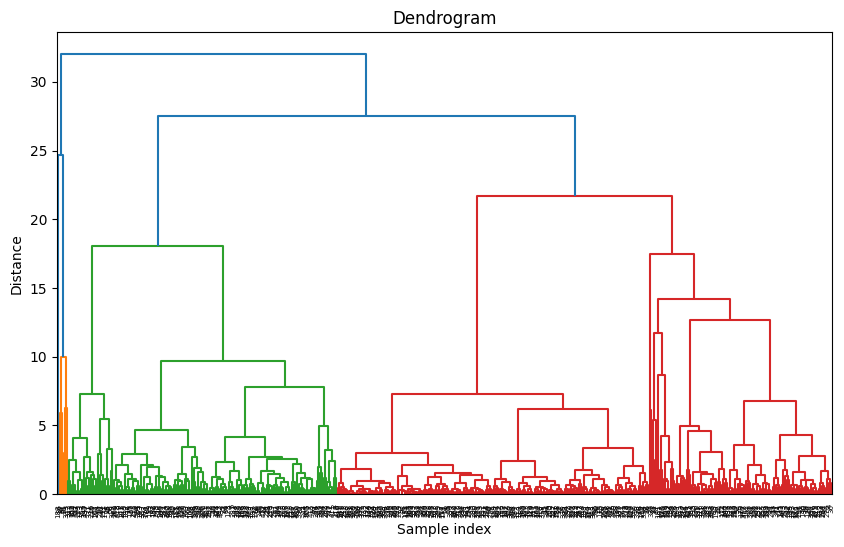

In [18]:
# # Generate the linkage matrix
# Z = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Generate the linkage matrix with the best method
Z = linkage(data_scaled, method=best_hierarchical_method)

# Get the cluster labels with the optimal number of clusters
labels_hierarchical = fcluster(Z, t=best_hierarchical_k, criterion='maxclust')

# Add labels to the original data
data['Cluster_Hierarchical'] = labels_hierarchical



**b. Visualization**

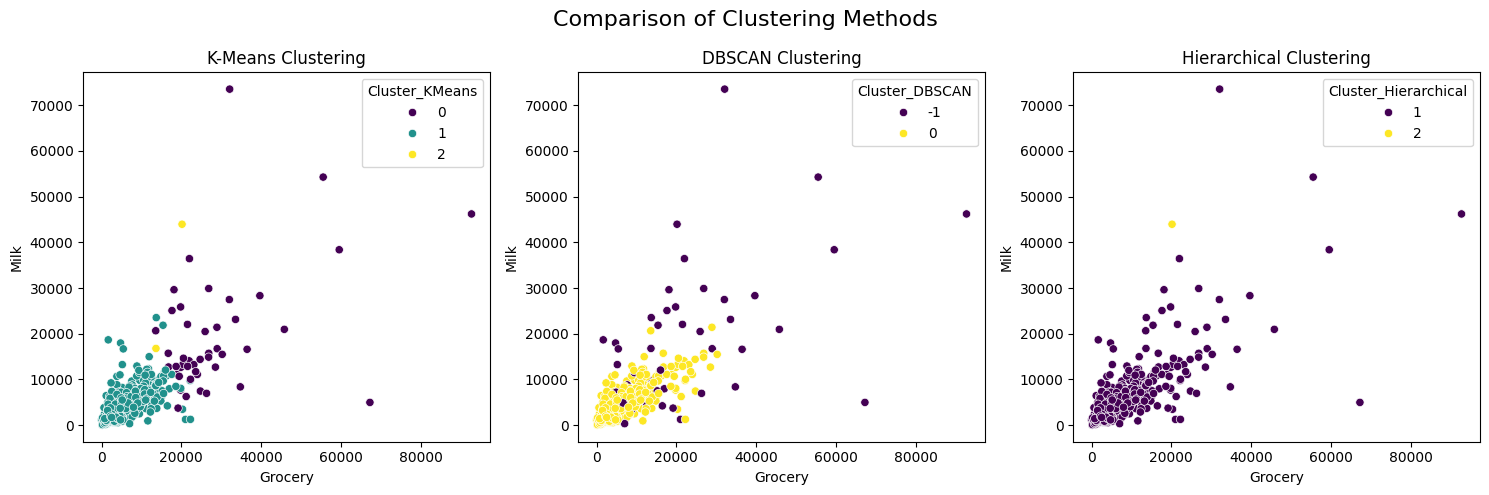

In [19]:
# Set up the plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Comparison of Clustering Methods', fontsize=16)

# K-Means Clustering
sns.scatterplot(x='Grocery', y='Milk', hue='Cluster_KMeans', data=data, palette='viridis', ax=ax1)
ax1.set_title('K-Means Clustering')

# DBSCAN Clustering
sns.scatterplot(x='Grocery', y='Milk', hue='Cluster_DBSCAN', data=data, palette='viridis', ax=ax2)
ax2.set_title('DBSCAN Clustering')

# Hierarchical Clustering
sns.scatterplot(x='Grocery', y='Milk', hue='Cluster_Hierarchical', data=data, palette='viridis', ax=ax3)
ax3.set_title('Hierarchical Clustering')

# Adjust layout and display
plt.tight_layout()
plt.show()


**c. Outlier Detection and Discussion**

In [20]:
# Outlier Detection
outliers = data[data['Cluster_DBSCAN'] == -1]
print(f'Number of outliers detected by DBSCAN: {len(outliers)}')


Number of outliers detected by DBSCAN: 48


# **Assignment 4**

**a. Evaluation of the Algorithm’s Performance**

In [21]:
# Silhouette scores
silhouette_kmeans = silhouette_score(data_scaled, labels_kmeans)
silhouette_dbscan = silhouette_score(data_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else -1
silhouette_hierarchical = silhouette_score(data_scaled, labels_hierarchical)

# Davies-Bouldin indices
db_index_kmeans = davies_bouldin_score(data_scaled, labels_kmeans)
db_index_dbscan = davies_bouldin_score(data_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else -1
db_index_hierarchical = davies_bouldin_score(data_scaled, labels_hierarchical)

# Print evaluation metrics
print(f'Silhouette Score (K-Means): {silhouette_kmeans}')
print(f'Silhouette Score (DBSCAN): {silhouette_dbscan}')
print(f'Silhouette Score (Hierarchical): {silhouette_hierarchical}')

print(f'Davies-Bouldin Index (K-Means): {db_index_kmeans}')
print(f'Davies-Bouldin Index (DBSCAN): {db_index_dbscan}')
print(f'Davies-Bouldin Index (Hierarchical): {db_index_hierarchical}')


Silhouette Score (K-Means): 0.5482872649700601
Silhouette Score (DBSCAN): 0.5607071607979794
Silhouette Score (Hierarchical): 0.8638007202163266
Davies-Bouldin Index (K-Means): 0.9279350629308419
Davies-Bouldin Index (DBSCAN): 1.7273219924308787
Davies-Bouldin Index (Hierarchical): 0.09266174602768207


**c. Conclusion**

In [22]:
# Select the best algorithm based on silhouette score and Davies-Bouldin index
if silhouette_kmeans > silhouette_dbscan and silhouette_kmeans > silhouette_hierarchical:
    best_algorithm = "K-Means"
elif silhouette_dbscan > silhouette_kmeans and silhouette_dbscan > silhouette_hierarchical:
    best_algorithm = "DBSCAN"
else:
    best_algorithm = "Hierarchical Clustering"

print(f'The best algorithm based on evaluation metrics is: {best_algorithm}')


The best algorithm based on evaluation metrics is: Hierarchical Clustering
